In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def show_image(img):
    plt.imshow(img, cmap="gray")
    plt.show()
    
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur,  50, 150)
    return canny

In [3]:
img = cv2.imread('foto_mesa.jpeg')

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
binary = cv2.threshold(blur, 40, 255, cv2.THRESH_BINARY_INV)

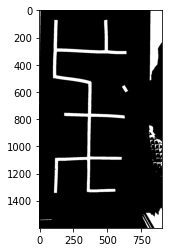

In [5]:
show_image(binary[1])

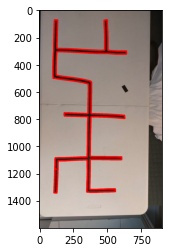

In [6]:
contours, _ = cv2.findContours(binary[1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Since all lines are connected they will be in the same contour, so just need to get the biggest contour
idx = np.argmax([c.size for c in contours])
contour = contours[idx]

img_contours = cv2.drawContours(img.copy(), contour, -1, (255, 0, 0), 10)
plt.imshow(img_contours)